In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

from collections import Counter

**Functions**

In [2]:
def classes_plot(targets, title):
    class_count = targets.value_counts()
    sns.barplot(class_count.index, class_count.values)
    plt.title(title)
    plt.ylabel('Number of Occurrences')
    plt.xlabel('Class', fontsize=12)
    plt.xticks([0, 1, 2, 3, 4, 5], ['Likely LOF', 'Likely GOF', 'LOF', 'Likely Neutral', 'Inconclusive', 'GOF'], rotation=45)

In [3]:
def print_top15(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top15 = np.argsort(clf.coef_[i])[-15:]
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top15)))

In [4]:
def confusion_matrix_plot(class_labels, range1=6, range2=6):
    df_cm = pd.DataFrame(cm, range(range1), range(range2))
    plt.figure(figsize = (12,10))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g', xticklabels = class_labels, yticklabels = class_labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title("Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

In [5]:
def gini_plot(class_name, words, values):
    plt.barh(words, values)
    plt.title('Gini Impurity ' + class_name)

In [6]:
def train_split_for_class_compare(class1, class2):
    find_list = [class1, class2]
    idx_list = []
    new_y_train = []
    for idx, num in enumerate(y_train_list):
      if num in find_list:
        idx_list.append(idx)
        new_y_train.append(num)

    new_X_train = []
    for idx, char in enumerate(X_train):
      if idx in idx_list:
        new_X_train.append(char)
        
    return new_X_train, new_y_train

In [7]:
def test_split_for_class_compare(class1, class2):
    find_list = [class1, class2]
    idx_list = []
    new_y_test = []
    for idx, num in enumerate(y_test_list):
      if num in find_list:
        idx_list.append(idx)
        new_y_test.append(num)

    new_X_test = []
    for idx, char in enumerate(X_test):
      if idx in idx_list:
        new_X_test.append(char)
        
    return new_X_test, new_y_test

In [8]:
def split_vectorize(text, target):
    X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=.3, random_state=88, stratify=target)
    vectorizer = CountVectorizer(min_df=.1, max_df=.9, stop_words=stops)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec, y_train, y_test, vectorizer 

In [9]:
def rf_feature_importance():
    cols = np.array(vectorizer.get_feature_names())
    sorted_idx = rf.feature_importances_.argsort()[-15:]
    words = cols[sorted_idx]
    values = rf.feature_importances_[sorted_idx]
    return words, values

**Useful lists**

In [10]:
# custom stop words
stops = ['figure', 'fig', 'al', 'et', 
         '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
         '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
         '2010', '2011', '2012', '2013', '2014', '2017',
         '1a', '1b', '1c', '1d', '1e', '1f',
         '2a', '2b', '2c', '2d', '2e', '2f',
         '3a', '3b', '3c', '3d', '3e', '3f',
         '4a', '4b', '4c', '4d', '4e', '4f',
         '5a', '5b', '5c', '5d',
         '6a', '6b', '6c', '6d',
         '7a', '7b', '7c',
         'wang', 'zhang']

In [11]:
# classes lists
classes_9 = ['Likely LOF', 'Likely GOF', 'Neutral', 'LOF', 'Likely Neutral', 'Inconclusive', 'GOF', 'Likely COF', 'COF']
classes_7 = ['Likely LOF', 'Likely GOF', 'Neutral', 'LOF', 'Likely Neutral', 'Inconclusive', 'GOF']
classes_6 = ['Likely LOF', 'Likely GOF', 'LOF', 'Likely Neutral', 'Inconclusive', 'GOF']

**Read in target data**

In [12]:
data = pd.read_csv("data/training_variants.csv",index_col='ID')

In [13]:
data.head()

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [14]:
data.tail()

,Gene,Variation,Class
ID,,,
3316,RUNX1,D171N,4
3317,RUNX1,A122*,1
3318,RUNX1,Fusions,1
3319,RUNX1,R80C,4
3320,RUNX1,K83E,4


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3321 non-null   object
 1   Variation  3321 non-null   object
 2   Class      3321 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 103.8+ KB


**Read in text data**

In [16]:
text = pd.read_csv('data/training_text.csv', sep = '\|\|', engine = 'python', names = ['ID','Text'], skiprows = 1, index_col = 'ID')

In [17]:
text.head()

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [18]:
text.tail()

,Text
ID,
3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,The Runt-related transcription factor 1 gene (...
3319,The RUNX1/AML1 gene is the most frequent targe...
3320,The most frequent mutations associated with le...


In [19]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3316 non-null   object
dtypes: object(1)
memory usage: 51.9+ KB


**Pre-process data**

In [20]:
# combine data sets
merged = data.merge(text, how='left', on='ID')

# drop where text is missing
merged = merged.dropna(how='any', subset=['Text'])

# drop classes 3, 8 & 9 - per Dan and Juliana
merged = merged[merged.Class != 8]
merged = merged[merged.Class != 9]
merged = merged[merged.Class != 3]

# add dummy variables to data frame for each existing class
for i in range(1,10):
    class_name = 'Class' + '_' + str(i) 
    merged[class_name] = np.where(merged['Class'] == i, 1, 0)

# drop if all values in a column are 0 (classes 3,8,9)
merged = merged.loc[:, (merged != 0).any(axis=0)]    

In [21]:
merged.head()

,Gene,Variation,Class,Text,Class_1,Class_2,Class_4,Class_5,Class_6,Class_7
ID,,,,,,,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,1,0,0,0,0,0
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,0,1,0,0,0,0
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,0,1,0,0,0,0
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,0,0,1,0,0,0
5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...,0,0,1,0,0,0


In [22]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3171 entries, 0 to 3320
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3171 non-null   object
 1   Variation  3171 non-null   object
 2   Class      3171 non-null   int64 
 3   Text       3171 non-null   object
 4   Class_1    3171 non-null   int64 
 5   Class_2    3171 non-null   int64 
 6   Class_4    3171 non-null   int64 
 7   Class_5    3171 non-null   int64 
 8   Class_6    3171 non-null   int64 
 9   Class_7    3171 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 272.5+ KB


In [23]:
# put the text variable into a list
text_list = merged.Text.tolist()
len(text_list)

3171

Overall class counts

/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


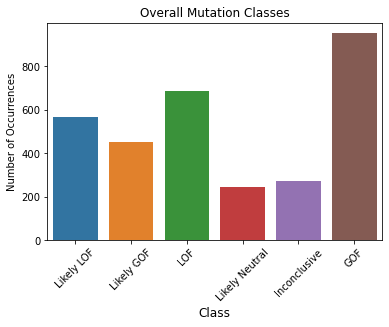

In [24]:
classes_plot(merged['Class'], 'Overall Mutation Classes')
plt.savefig('img/overall_mutation_classes.png')

In [25]:
merged['Class'].value_counts()

7    952
4    686
1    566
2    452
6    273
5    242
Name: Class, dtype: int64

Create target variables

In [26]:
# overall target variable
y = merged['Class']
type(y)

pandas.core.series.Series

In [27]:
y_1 = merged['Class_1']
y_2 = merged['Class_2']
y_4 = merged['Class_4']
y_5 = merged['Class_5']
y_6 = merged['Class_6']
y_7 = merged['Class_7']

**Train test split and EDA**

In [28]:
# train test split first
X_train, X_test, y_train, y_test = train_test_split(text_list, y, test_size=.3, random_state=88, stratify=y)

/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


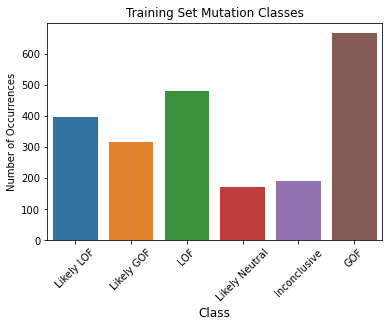

In [29]:
classes_plot(y_train, 'Training Set Mutation Classes')
plt.savefig('img/training_set_mutation_classes.png')

In [30]:
y_train.value_counts()

7    666
4    480
1    396
2    316
6    191
5    170
Name: Class, dtype: int64

/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


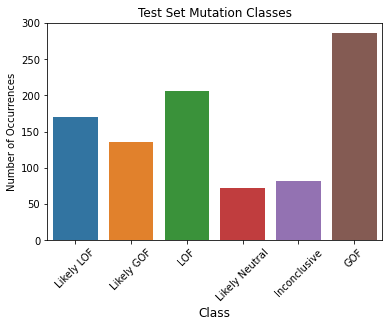

In [31]:
classes_plot(y_test, 'Test Set Mutation Classes')
plt.savefig('img/test_set_mutation_classes')

In [32]:
y_test.value_counts()

7    286
4    206
1    170
2    136
6     82
5     72
Name: Class, dtype: int64

**Vectorize**

In [33]:
vectorizer = CountVectorizer(min_df=.1, max_df=.9, stop_words=stops)

In [34]:
X_train_vec = vectorizer.fit_transform(X_train)

In [35]:
X_test_vec = vectorizer.transform(X_test)

In [36]:
X_train_vec.shape

(2219, 3545)

In [37]:
X_test_vec.shape

(952, 3545)

**Model - Naive Bayes**

In [38]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [39]:
nb.score(X_test_vec, y_test)

0.5535714285714286

In [40]:
y_pred = nb.predict(X_test_vec)
class_labels = nb.classes_

In [41]:
print_top15(vectorizer, nb, class_labels)

1: amino loss functional structure mutants function brca1 patients tumors proteins table genes tumor variants p53
2: treatment raf clinical genes table ras activation exon tumors braf kit tumor kinase egfr patients
4: patients levels table assay missense ras functional tumor function proteins mutants p53 variants brca1 pten
5: based sequence missense function brca2 deleterious table variant neutral assay brct assays functional variants brca1
6: residues site missense table interaction sequence tumor family brca2 variant resistance kinase deleterious variants brca1
7: flt3 table signaling growth raf exon mutants kit tumors activation ras tumor egfr kinase patients


In [42]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[ 85,  14,  31,  26,   2,  12],
       [  5,  80,   8,   4,   3,  36],
       [ 63,   8, 104,  15,   3,  13],
       [  8,   6,   4,  37,   5,  12],
       [  9,  10,   4,   9,  44,   6],
       [ 15,  81,  10,   3,   0, 177]])

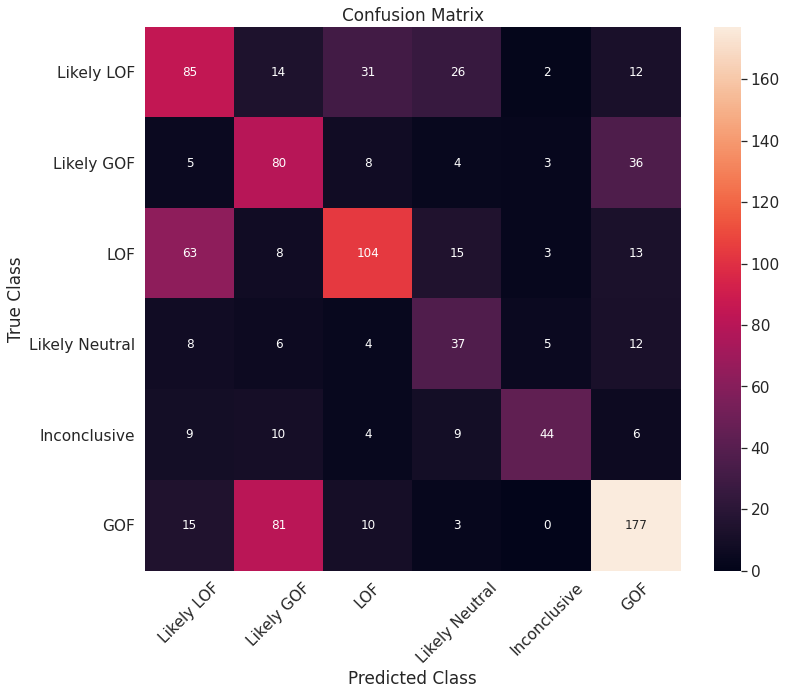

<Figure size 432x288 with 0 Axes>

In [43]:
confusion_matrix_plot(classes_6)
plt.savefig('img/nb_6_class_cm.png')

**Model - Random Forest**

In [44]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

RandomForestClassifier()

In [45]:
rf.score(X_test_vec, y_test)

0.6722689075630253

In [46]:
y_pred = rf.predict(X_test_vec)
class_labels = rf.classes_

In [47]:
cols = np.array(vectorizer.get_feature_names())
sorted_idx = rf.feature_importances_.argsort()[-15:]
words = cols[sorted_idx]
values = rf.feature_importances_[sorted_idx]

In [48]:
print(words)
print(values)

['functional' 'oncogenic' 'activated' 'signaling' 'inhibitors' 'treatment'
 'function' 'nonsense' 'tyrosine' 'constitutive' 'phosphorylation'
 'suppressor' 'activating' 'kinase' 'activation']
[0.00342581 0.00353637 0.00361632 0.00364097 0.00392429 0.0039446
 0.00402593 0.0040734  0.0048111  0.00503111 0.00504866 0.0053915
 0.00573711 0.00708864 0.00742553]


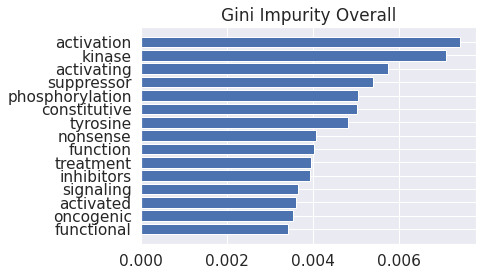

In [49]:
gini_plot('Overall', words, values)
plt.savefig('img/rf_gini_overall')

In [50]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[ 78,   2,  52,  19,   4,  15],
       [  4,  70,   4,   5,   2,  51],
       [ 29,   1, 149,   5,   2,  20],
       [  6,   2,  13,  38,   2,  11],
       [  6,   1,   3,   2,  56,  14],
       [  1,  20,   6,   9,   1, 249]])

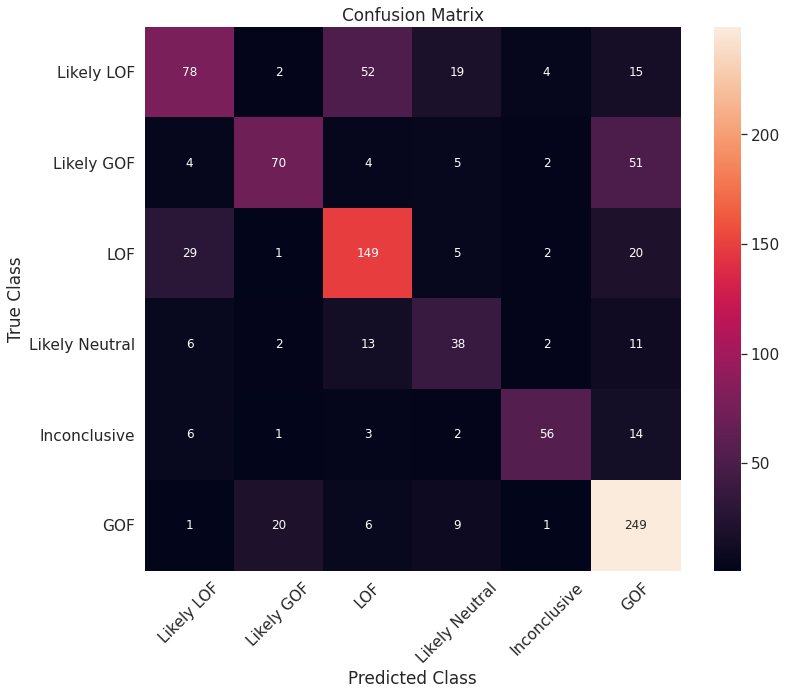

<Figure size 432x288 with 0 Axes>

In [51]:
confusion_matrix_plot(classes_6)
plt.savefig('img/rf_6_class_cm.png')

**Models to compare classes that the main model confuses most often**

Lists for train and test

In [52]:
y_train_list = list(y_train)
print(type(y_train_list))
print(len(y_train_list))

<class 'list'>
2219


In [53]:
y_test_list = list(y_test)
print(type(y_test_list))
print(len(y_test_list))

<class 'list'>
952


**Comparing class 2 & 7 - Likely GOF and GOF**

**Process**

In [54]:
new_X_train, new_y_train = train_split_for_class_compare(2, 7)
new_X_test, new_y_test = test_split_for_class_compare(2, 7)

In [55]:
print(new_y_train[:10])
print(new_y_test[:10])

[2, 2, 2, 2, 7, 7, 2, 2, 7, 7]
[7, 2, 7, 7, 2, 7, 7, 2, 2, 2]


In [56]:
print(len(new_X_train))
print(len(new_y_train))
print(len(new_X_test))
print(len(new_y_test))

982
982
422
422


In [57]:
print(Counter(new_y_train))
print(Counter(new_y_test))

Counter({7: 666, 2: 316})
Counter({7: 286, 2: 136})


**Vectorize**

In [58]:
vectorizer = CountVectorizer(min_df=.1, max_df=.9, stop_words=stops)
X_train_vec = vectorizer.fit_transform(new_X_train)
X_test_vec = vectorizer.transform(new_X_test)

In [59]:
print(X_train_vec.shape)
print(X_test_vec.shape)

(982, 3809)
(422, 3809)


In [60]:
# for k, v in sorted(vectorizer.vocabulary_.items()):
#     print(k, v)

**Model - Random Forest**

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, new_y_train)

RandomForestClassifier()

In [62]:
rf.score(X_test_vec, new_y_test)

0.7985781990521327

In [63]:
y_pred = rf.predict(X_test_vec)
class_labels = ['Likely GOF', 'GOF']

In [64]:
words, values = rf_feature_importance()
print(words)
print(values)

['proteins' 'next' 'human' 'activate' 'phosphorylated' 'mice' 'lines'
 'culture' 'pathway' 'enhanced' 'signaling' 'expressing' 'constitutive'
 'mutants' 'phosphorylation']
[0.00224246 0.00225129 0.00225393 0.00234736 0.0023546  0.00240218
 0.00240366 0.00253218 0.00301921 0.00376183 0.00383777 0.00399975
 0.00479183 0.00488486 0.0066826 ]


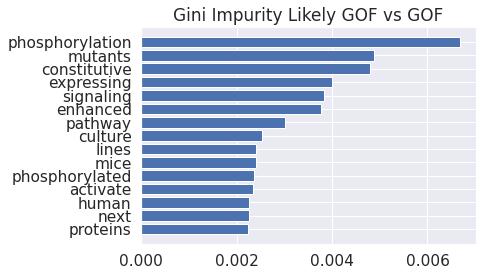

In [65]:
gini_plot('Likely GOF vs GOF', words, values)
plt.savefig('img/rf_gini_gof.png')

In [66]:
cm = confusion_matrix(y_true=new_y_test, y_pred=y_pred)
cm

array([[ 71,  65],
       [ 20, 266]])

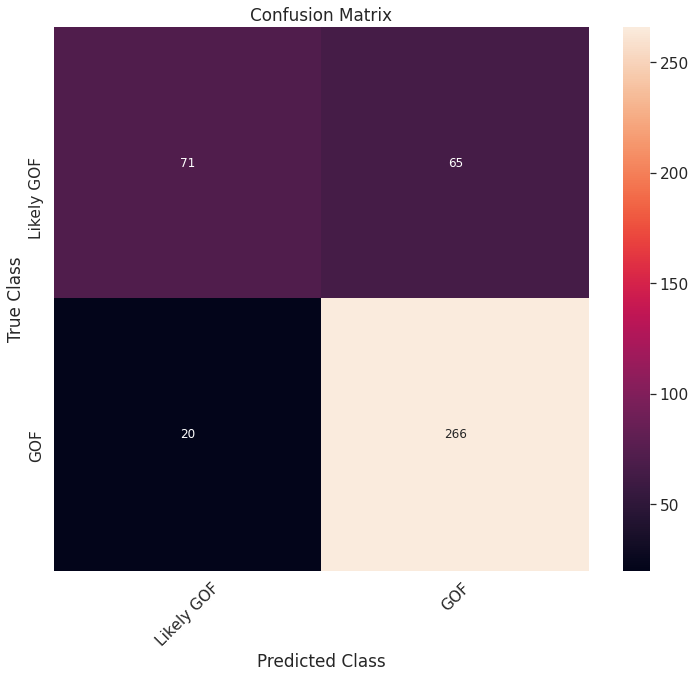

<Figure size 432x288 with 0 Axes>

In [67]:
confusion_matrix_plot(class_labels, 2, 2)
plt.savefig('img/rf_gof_cm.png')

In [68]:
print('Accuracy score: {}'.format(accuracy_score(y_true=new_y_test, y_pred=y_pred)))
# print('Recall score: {}'.format(recall_score(y_true=new_y_test, y_pred=y_pred)))
# print('Precision score: {}'.format(precision_score(y_true=new_y_test, y_pred=y_pred)))

Accuracy score: 0.7985781990521327


**Comparing class 1 & 4 - Likely LOF and LOF**

**Process**

In [69]:
new_X_train, new_y_train = train_split_for_class_compare(1, 4)
new_X_test, new_y_test = test_split_for_class_compare(1, 4)

In [70]:
print(new_y_train[:10])
print(new_y_test[:10])

[4, 4, 1, 1, 1, 4, 4, 1, 1, 1]
[1, 4, 4, 1, 4, 1, 4, 4, 1, 1]


In [71]:
print(len(new_X_train))
print(len(new_y_train))
print(len(new_X_test))
print(len(new_y_test))

876
876
376
376


In [72]:
print(Counter(new_y_train))
print(Counter(new_y_test))

Counter({4: 480, 1: 396})
Counter({4: 206, 1: 170})


**Vectorize**

In [73]:
vectorizer = CountVectorizer(min_df=.1, max_df=.9, stop_words=stops)
X_train_vec = vectorizer.fit_transform(new_X_train)
X_test_vec = vectorizer.transform(new_X_test)

In [74]:
print(X_train_vec.shape)
print(X_test_vec.shape)

(876, 3462)
(376, 3462)


In [75]:
# for k, v in sorted(vectorizer.vocabulary_.items()):
#     print(k, v)

**Model - Random Forest**

In [76]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, new_y_train)

RandomForestClassifier()

In [77]:
rf.score(X_test_vec, new_y_test)

0.7792553191489362

In [78]:
y_pred = rf.predict(X_test_vec)
class_labels = ['Likely LOF', 'LOF']

In [79]:
words, values = rf_feature_importance()
print(words)
print(values)

['sequenced' 'otherwise' 'defined' 'based' 'genes' 'mapping' 'surface'
 'akt' 'made' 'pten' 'transcription' 'phosphatase' 'val'
 'phosphoinositide' 'inactive']
[0.00230202 0.00230742 0.00231814 0.00248516 0.00251368 0.00256086
 0.00271354 0.00277484 0.00287015 0.00364946 0.00368215 0.00375425
 0.00437733 0.00490215 0.00597389]


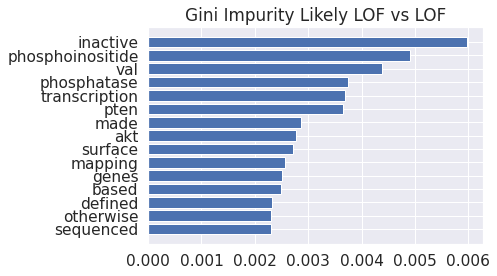

In [80]:
gini_plot('Likely LOF vs LOF', words, values)
plt.savefig('img/rf_gini_lof.png')

In [81]:
cm = confusion_matrix(y_true=new_y_test, y_pred=y_pred)
cm

array([[125,  45],
       [ 38, 168]])

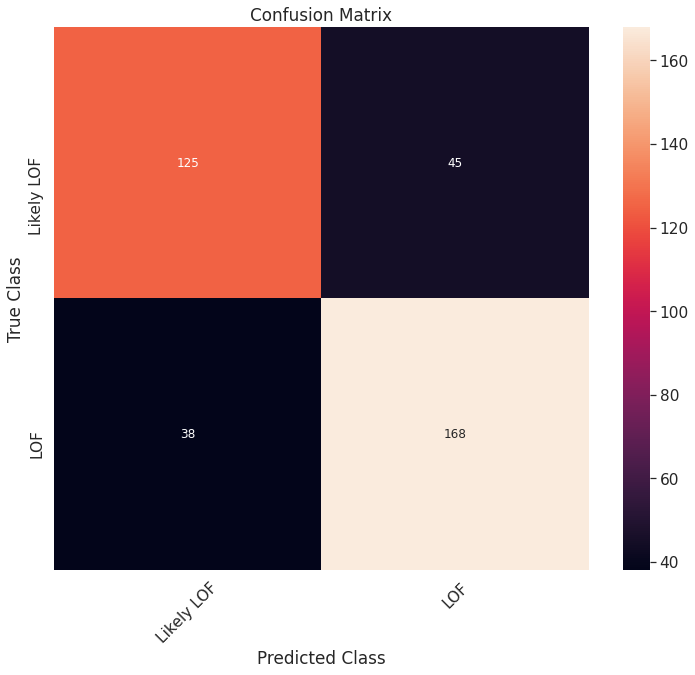

<Figure size 432x288 with 0 Axes>

In [82]:
confusion_matrix_plot(class_labels, 2, 2)
plt.savefig('img/rf_lof_cm.png')

In [83]:
print('Accuracy score: {}'.format(accuracy_score(y_true=new_y_test, y_pred=y_pred)))
print('Recall score: {}'.format(recall_score(y_true=new_y_test, y_pred=y_pred)))
print('Precision score: {}'.format(precision_score(y_true=new_y_test, y_pred=y_pred)))

Accuracy score: 0.7792553191489362
Recall score: 0.7352941176470589
Precision score: 0.7668711656441718
